**From uper Menu choose:**
---
Runtime --> Change runtime type:
---
change Hardare accelerator to (gpu)

In [1]:
%tensorflow_version 1.15
import tensorflow as tf
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

In [4]:
print(train_images.shape[1:])

(28, 28)


#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature

In [5]:
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

784


#convert data to float and scale values between 0 and 1

In [0]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')
train_datad = train_data.astype('float')
test_datad = test_data.astype('float')

#scale data

In [0]:
train_data /=255.0
test_data /=255.0

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()

In [0]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network

In [9]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model

In [10]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 9s 156us/step - loss: 0.2699 - acc: 0.9165 - val_loss: 0.1259 - val_acc: 0.9589
Epoch 2/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0918 - acc: 0.9720 - val_loss: 0.1140 - val_acc: 0.9637
Epoch 3/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0571 - acc: 0.9822 - val_loss: 0.0884 - val_acc: 0.9725
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0399 - acc: 0.9875 - val_loss: 0.0785 - val_acc: 0.9773
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0288 - acc: 0.9905 - val_loss: 0.0672 - val_acc: 0.9801
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0214 - acc: 0.9930 - val_loss: 0.0679 - val_acc: 0.9818
Epoch 7/10
60000/60000 [=

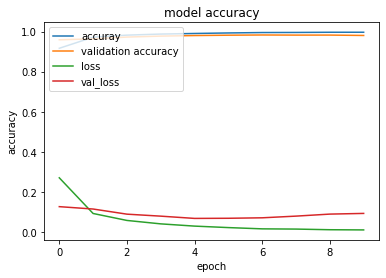

In [25]:

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuray', 'validation accuracy','loss','val_loss'], loc='upper left')
plt.show()

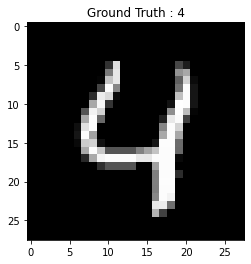

In [27]:
plt.imshow(test_images[4,:,:],cmap='gray')
plt.title('Ground Truth : {}'.format(test_labels[4]))
plt.show()

In [28]:

x=model.predict_classes(test_data[[4],:])
print("Predicted label",test_labels[x])

Predicted label [4]


In [16]:
m = Sequential()
m.add(Dense(512, activation='relu', input_shape=(dimData,)))
m.add(Dense(512, activation='relu'))
m.add(Dense(512, activation='tanh'))
m.add(Dense(512, activation='sigmoid'))
m.add(Dense(10, activation='softmax'))
m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
m.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.3297 - acc: 0.8947 - val_loss: 0.1237 - val_acc: 0.9598
Epoch 2/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.1040 - acc: 0.9675 - val_loss: 0.1347 - val_acc: 0.9603
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0663 - acc: 0.9793 - val_loss: 0.0779 - val_acc: 0.9768
Epoch 4/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0465 - acc: 0.9855 - val_loss: 0.0727 - val_acc: 0.9782
Epoch 5/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.0356 - acc: 0.9892 - val_loss: 0.0919 - val_acc: 0.9753
Epoch 6/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0292 - acc: 0.9910 - val_loss: 0.1354 - val_acc: 0.9708
Epoch 7/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.0229 - acc: 0.9930 - val_loss: 0.0990 - val_acc

In [17]:

p = Sequential()
p.add(Dense(512, activation='relu', input_shape=(dimData,)))
p.add(Dense(512, activation='relu'))
p.add(Dense(10, activation='softmax'))
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_datad, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_datad, test_labels_one_hot)) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 21us/step - loss: 10.4590 - acc: 0.3498 - val_loss: 8.5843 - val_acc: 0.4668
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 7.9098 - acc: 0.5078 - val_loss: 7.5527 - val_acc: 0.5306
Epoch 3/10
60000/60000 [==============================] - 1s 18us/step - loss: 7.4533 - acc: 0.5370 - val_loss: 7.2388 - val_acc: 0.5500
Epoch 4/10
60000/60000 [==============================] - 1s 17us/step - loss: 7.2978 - acc: 0.5467 - val_loss: 7.0133 - val_acc: 0.5647
Epoch 5/10
60000/60000 [==============================] - 1s 17us/step - loss: 7.3003 - acc: 0.5466 - val_loss: 7.1767 - val_acc: 0.5543
Epoch 6/10
60000/60000 [==============================] - 1s 18us/step - loss: 7.2479 - acc: 0.5500 - val_loss: 7.0883 - val_acc: 0.5598
Epoch 7/10
60000/60000 [==============================] - 1s 19us/step - loss: 7.1723 - acc: 0.5547 - val_loss: 7.2148 - val_ac

In [18]:
from keras.models import Model
from keras.layers import Input
i=Input(shape=(784,))
x= Dense(512, activation='relu')(i)
x= Dense(512, activation='relu')(x)

x= Dense(10, activation='softmax')(x)
p = Model(input=i,output=x)
p.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
p.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.2708 - acc: 0.9166 - val_loss: 0.1196 - val_acc: 0.9626
Epoch 2/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0940 - acc: 0.9707 - val_loss: 0.0888 - val_acc: 0.9741
Epoch 3/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0588 - acc: 0.9817 - val_loss: 0.1021 - val_acc: 0.9700
Epoch 4/10
60000/60000 [==============================] - 1s 19us/step - loss: 0.0411 - acc: 0.9864 - val_loss: 0.0623 - val_acc: 0.9812
Epoch 5/10
60000/60000 [==============================] - 1s 18us/step - loss: 0.0296 - acc: 0.9904 - val_loss: 0.0681 - val_acc: 0.9811
Epoch 6/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0222 - acc: 0.9925 - val_loss: 0.0957 - val_acc: 0.9744
Epoch 7/10
60000/60000 [==============================] - 1s 17us/step - loss: 0.0176 - acc: 0.9945 - val_loss: 0.0860 - val_acc